## Многослойный персептрон


### Подключение модулей и библиотек

In [1]:
import pickle
import numpy as np
import os

In [2]:
import shutil
shutil.rmtree('img_mnist')

In [3]:
import mlp

### Настройка путей для сохранения файлов

In [11]:
data_dir = os.path.join(os.getcwd(), 'mnist.pkl')


img_dir = os.path.join(os.getcwd(), 'img_mnist')
if not os.path.isdir(img_dir):
    os.mkdir(img_dir)

### Чтение и просмотр данных

In [12]:
with open('mnist.pkl', 'rb') as f:
    MNIST = pickle.load(f)

MNIST

{'Train': {'Labels': array([1, 0, 1, ..., 7, 6, 9]),
  'Features': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]])}}

Видно, что имеется 2 набора данных:
- Features - матрица признаковых описаний объектов (значения пикселей каждой картинки)
- Labels - вектор ответов (принадлежность картинки к определенному классу)

Разделим данные на 2 переменные:
- labels - вектор ответов (значения классов)
- data - матрица признаков (значения пикселей)

In [13]:
labels = MNIST['Train']['Labels']
data = MNIST['Train']['Features']

Необходимо:
1. Поменять тип данных для признаков на float, чтобы во время обучения и применения нейронных сетей тип данных был везде одинаковый. При приведении к int дробная часть отсекается, что ведет к увеличению погрешности в вычислениях
2. Отмасштабировать все значения пикселей к значениям от 0 до 1,иначе в ходе вычислений большие значения могут привести к ошибкам

In [14]:
data = data.astype(float)
data = data / 255

Разбиваем признаки и ответы на обучающую и тестовую выборки

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

### Применение нейронных сетей и отображение графика обучения

In [16]:
loss = mlp.LossFunction('cross-entropy')
metrics = mlp.NeuralNetworkMetrics()
n_epoch = 30

Применение нейронной сети с одним слоем (с различными гиперпараметрами)

Initial train loss=2.323, accuracy=0.131
Initial valid loss=2.327, accuracy=0.129
Final train loss=0.286, accuracy=0.921
Final valid loss=0.309, accuracy=0.913


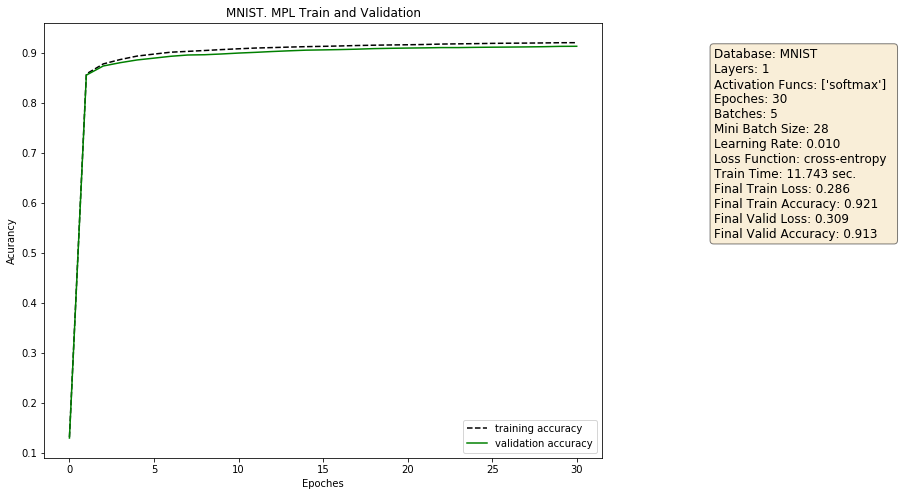

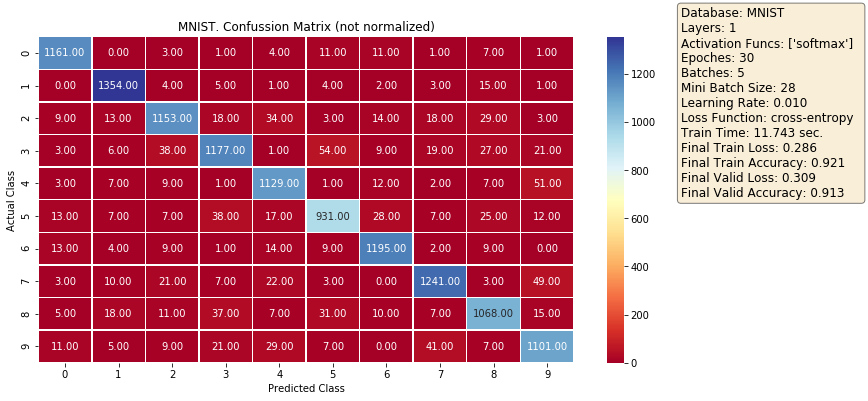

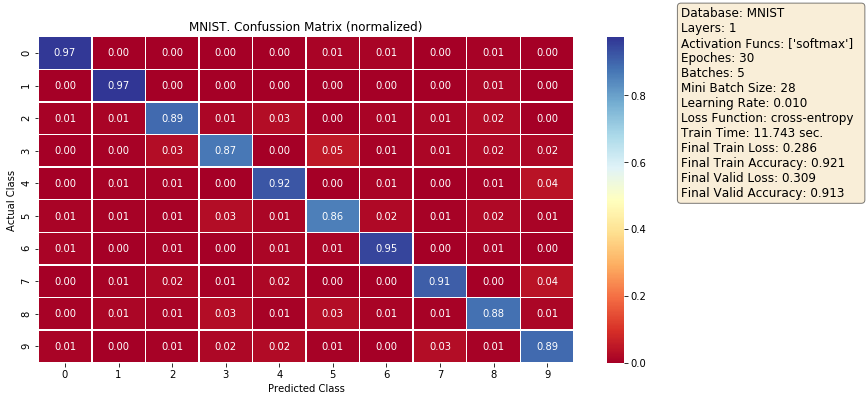

Database: MNIST  
Layers: 1  
Activation Funcs: ['softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 28  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 11.743 sec.  
Final Train Loss: 0.286  
Final Train Accuracy: 0.921  
Final Valid Loss: 0.309  
Final Valid Accuracy: 0.913


In [17]:
layer1 = mlp.NeuralNetworkLayer(784, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=28, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
               n_batches=5, db_name='MNIST', img_dir=os.path.join(img_dir, 'layers 1'), img_format=' 1.png')
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'MNIST', os.path.join(img_dir, 'layers 1'), ' 1.png', description)
print(description)

Initial train loss=2.371, accuracy=0.096
Initial valid loss=2.374, accuracy=0.094
Final train loss=0.243, accuracy=0.933
Final valid loss=0.286, accuracy=0.920


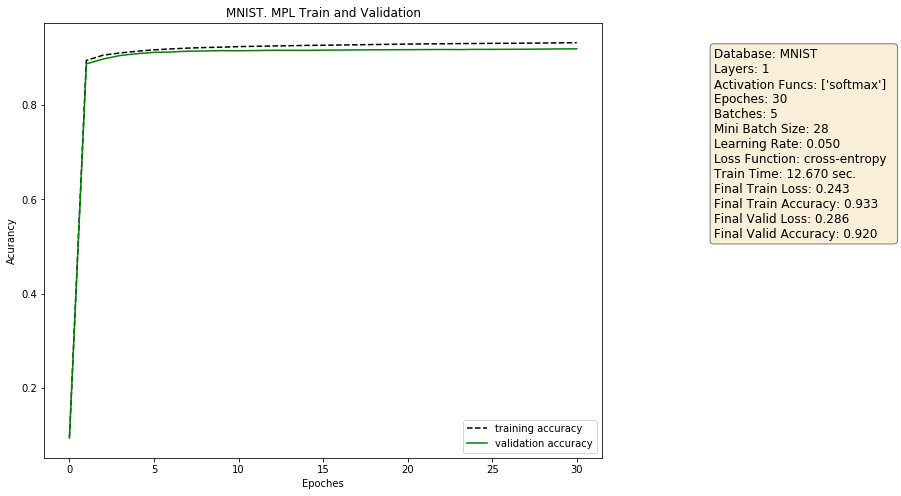

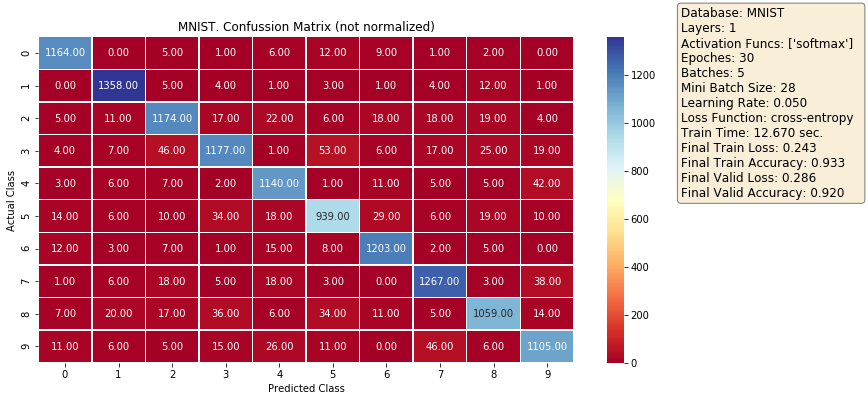

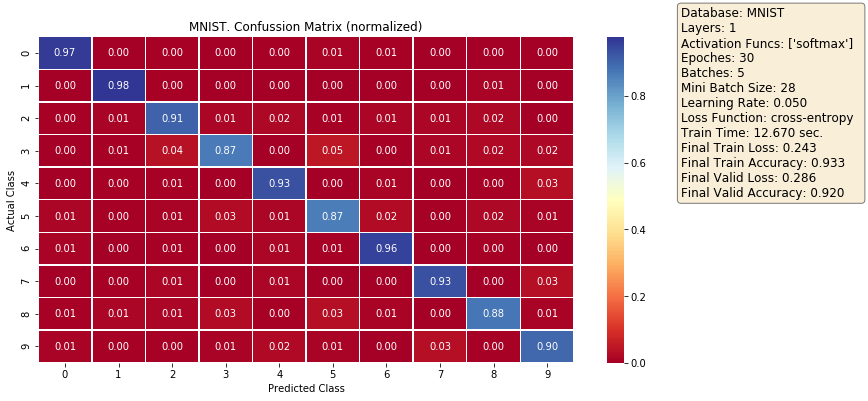

Database: MNIST  
Layers: 1  
Activation Funcs: ['softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 28  
Learning Rate: 0.050  
Loss Function: cross-entropy  
Train Time: 12.670 sec.  
Final Train Loss: 0.243  
Final Train Accuracy: 0.933  
Final Valid Loss: 0.286  
Final Valid Accuracy: 0.920


In [18]:
layer1 = mlp.NeuralNetworkLayer(784, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=28, learning_rate=0.05) #learn rate increased
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
               n_batches=5, db_name='MNIST', img_dir=os.path.join(img_dir, 'layers 1'), img_format=' 2.png')
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'MNIST', os.path.join(img_dir, 'layers 1'), ' 2.png', description)
print(description)

Initial train loss=2.317, accuracy=0.084
Initial valid loss=2.325, accuracy=0.077
Final train loss=0.232, accuracy=0.936
Final valid loss=0.290, accuracy=0.918


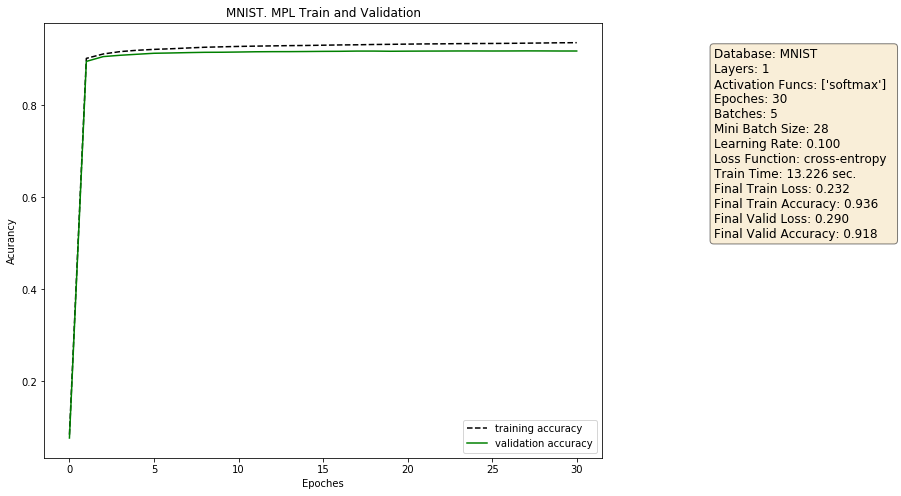

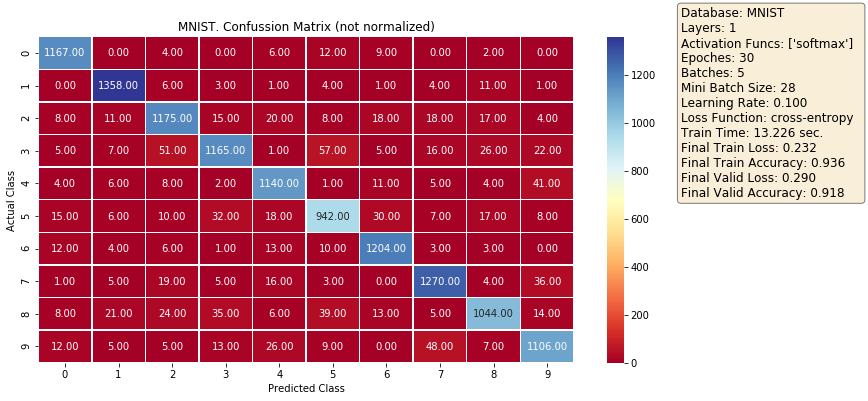

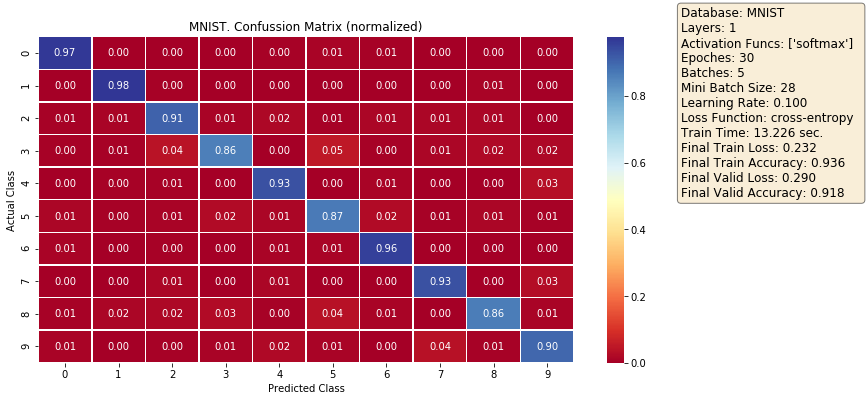

Database: MNIST  
Layers: 1  
Activation Funcs: ['softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 28  
Learning Rate: 0.100  
Loss Function: cross-entropy  
Train Time: 13.226 sec.  
Final Train Loss: 0.232  
Final Train Accuracy: 0.936  
Final Valid Loss: 0.290  
Final Valid Accuracy: 0.918


In [19]:
layer1 = mlp.NeuralNetworkLayer(784, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=28, learning_rate=0.1) #Learn Rate increased
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
               n_batches=5, db_name='MNIST', img_dir=os.path.join(img_dir, 'layers 1'), img_format=' 3.png')
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'MNIST', os.path.join(img_dir, 'layers 1'), ' 3.png', description)
print(description)

### Применение нейронной сети с 2-мя слоями (с различными гиперпараметрами)

Initial train loss=2.392, accuracy=0.086
Initial valid loss=2.394, accuracy=0.085
Final train loss=0.153, accuracy=0.958
Final valid loss=0.188, accuracy=0.946


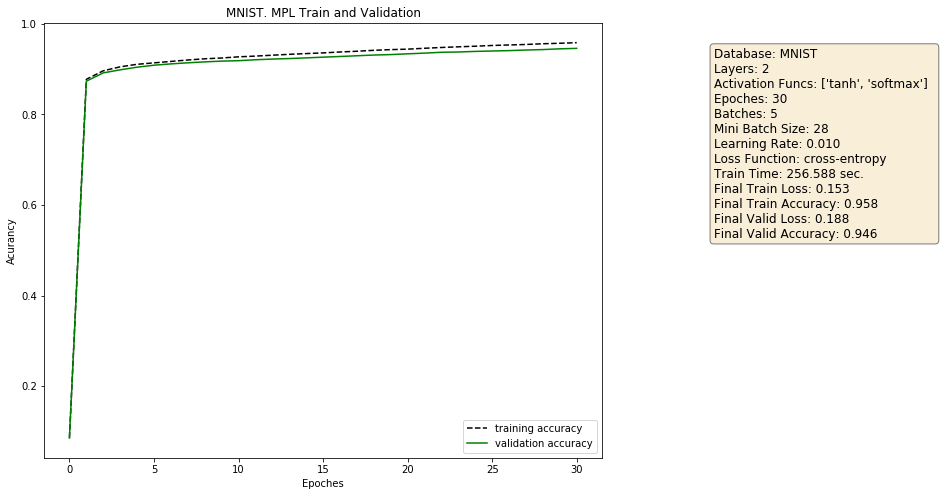

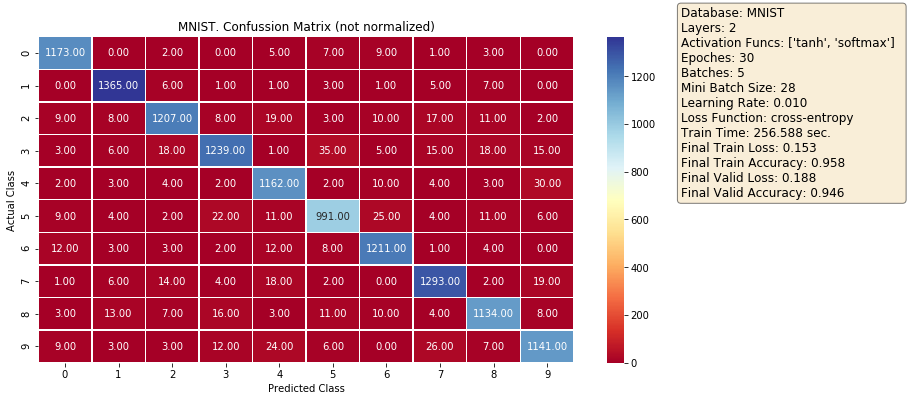

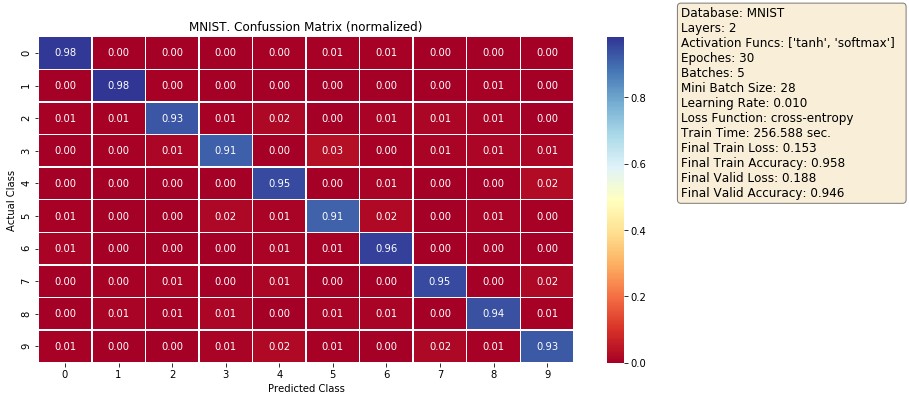

Database: MNIST  
Layers: 2  
Activation Funcs: ['tanh', 'softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 28  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 256.588 sec.  
Final Train Loss: 0.153  
Final Train Accuracy: 0.958  
Final Valid Loss: 0.188  
Final Valid Accuracy: 0.946


In [20]:
layer1 = mlp.NeuralNetworkLayer(784, 392, activation_func=mlp.ActivationFunction('tanh'))
layer2 = mlp.NeuralNetworkLayer(392, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1, layer2])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=28, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
               n_batches=5, db_name='MNIST', img_dir=os.path.join(img_dir, 'layers 2'), img_format=' 1.png')
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'MNIST', os.path.join(img_dir, 'layers 2'), ' 1.png', description)
print(description)

Initial train loss=2.416, accuracy=0.093
Initial valid loss=2.420, accuracy=0.087
Final train loss=0.284, accuracy=0.918
Final valid loss=0.304, accuracy=0.912


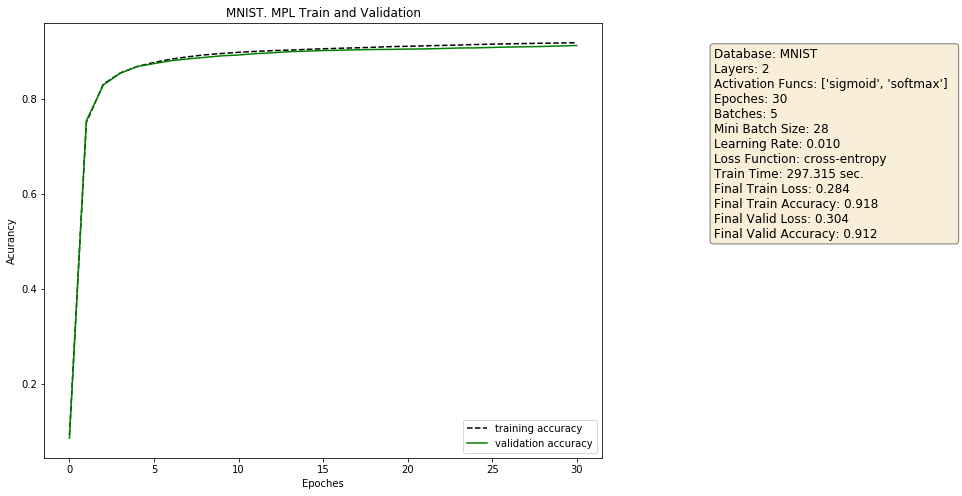

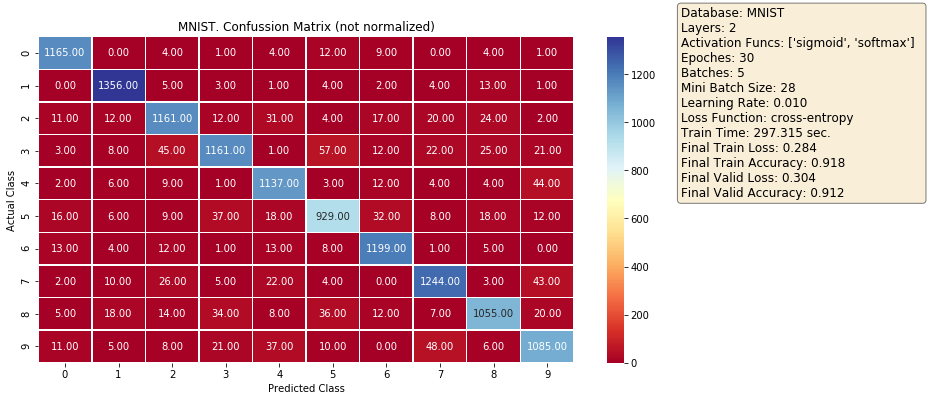

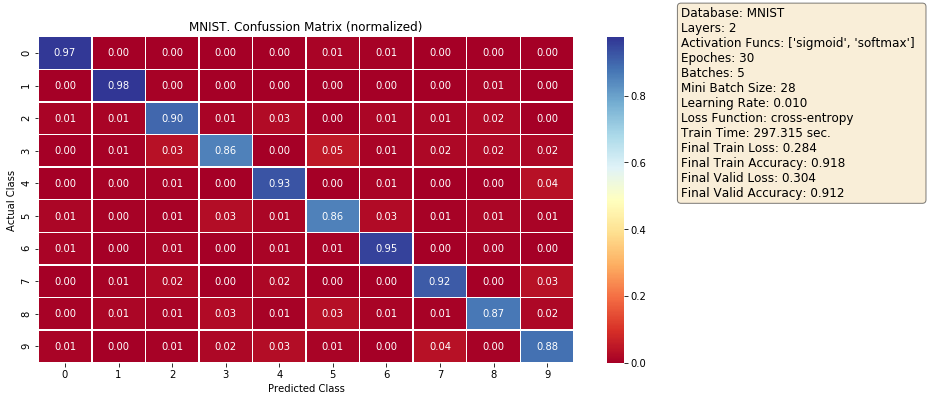

Database: MNIST  
Layers: 2  
Activation Funcs: ['sigmoid', 'softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 28  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 297.315 sec.  
Final Train Loss: 0.284  
Final Train Accuracy: 0.918  
Final Valid Loss: 0.304  
Final Valid Accuracy: 0.912


In [21]:
layer1 = mlp.NeuralNetworkLayer(784, 392, activation_func=mlp.ActivationFunction('sigmoid'))
layer2 = mlp.NeuralNetworkLayer(392, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1, layer2])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=28, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
               n_batches=5, db_name='MNIST', img_dir=os.path.join(img_dir, 'layers 2'), img_format=' 2.png')
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'MNIST', os.path.join(img_dir, 'layers 2'), ' 2.png', description)
print(description)

### Применение нейронной сети с 3-мя слоями (с различными гиперпараметрами)

Initial train loss=2.332, accuracy=0.100
Initial valid loss=2.336, accuracy=0.095
Final train loss=0.190, accuracy=0.946
Final valid loss=0.219, accuracy=0.936


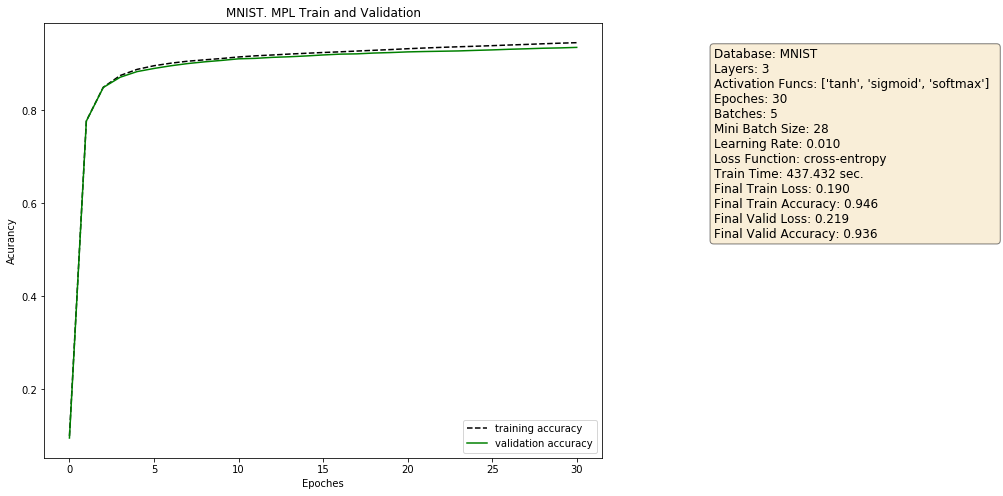

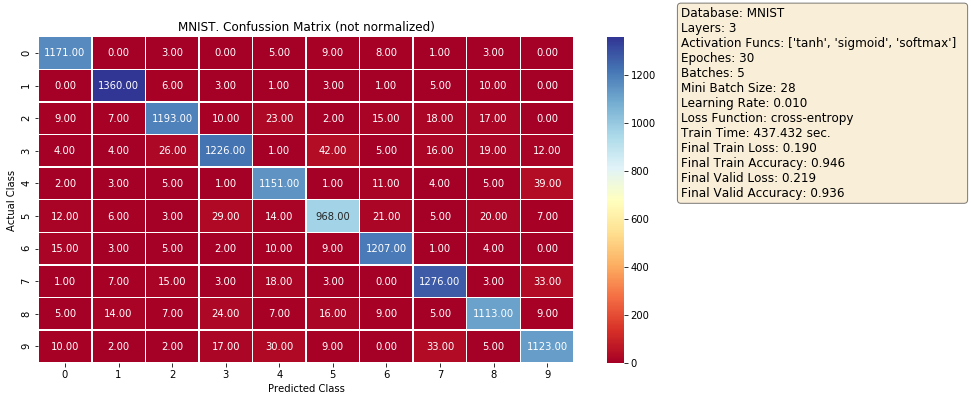

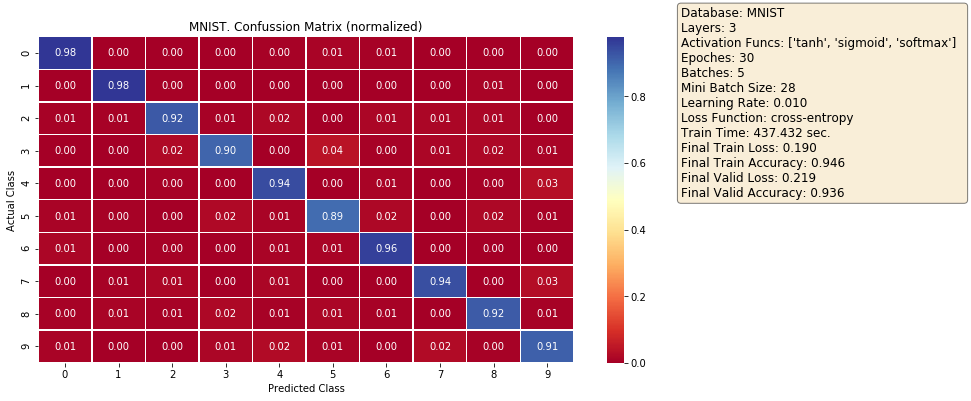

Database: MNIST  
Layers: 3  
Activation Funcs: ['tanh', 'sigmoid', 'softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 28  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 437.432 sec.  
Final Train Loss: 0.190  
Final Train Accuracy: 0.946  
Final Valid Loss: 0.219  
Final Valid Accuracy: 0.936


In [22]:
layer1 = mlp.NeuralNetworkLayer(784, 392, activation_func=mlp.ActivationFunction('tanh'))
layer2 = mlp.NeuralNetworkLayer(392, 196, activation_func=mlp.ActivationFunction('sigmoid'))
layer3 = mlp.NeuralNetworkLayer(196, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1, layer2, layer3])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=28, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
               n_batches=5, db_name='MNIST', img_dir=os.path.join(img_dir, 'layers 3'), img_format=' 1.png')
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'MNIST', os.path.join(img_dir, 'layers 3'), ' 1.png', description)
print(description)

Initial train loss=2.351, accuracy=0.103
Initial valid loss=2.347, accuracy=0.108
Final train loss=0.235, accuracy=0.932
Final valid loss=0.264, accuracy=0.922


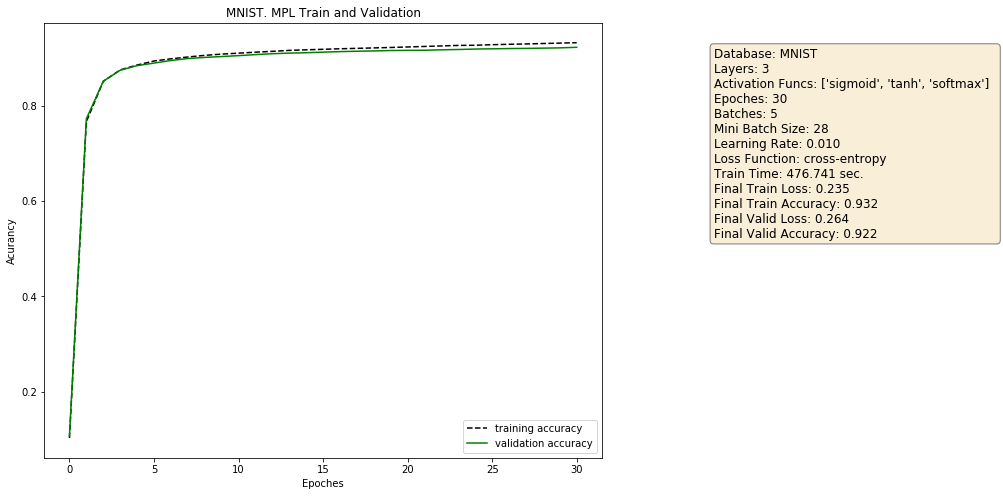

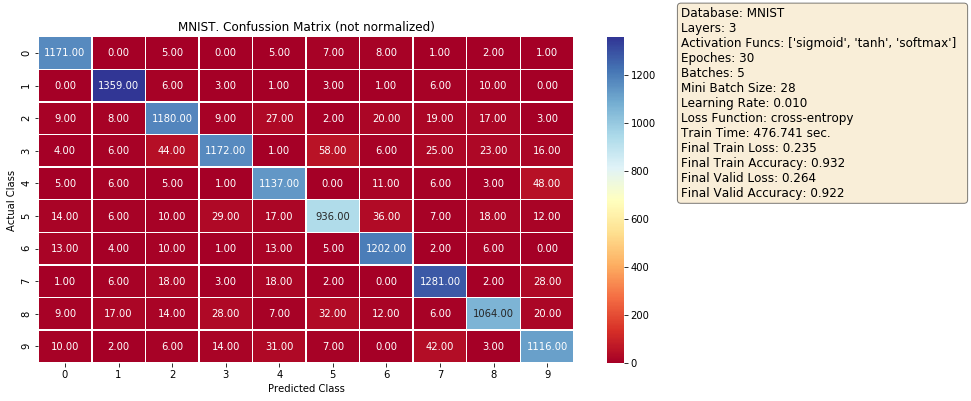

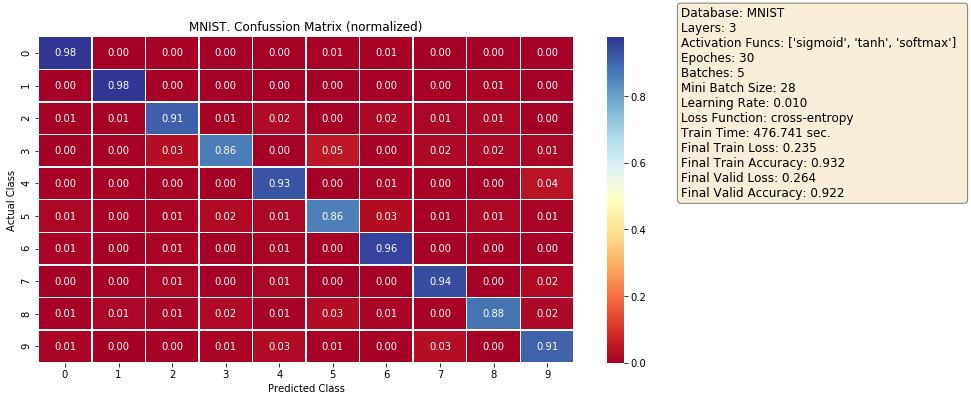

Database: MNIST  
Layers: 3  
Activation Funcs: ['sigmoid', 'tanh', 'softmax']  
Epoches: 30  
Batches: 5  
Mini Batch Size: 28  
Learning Rate: 0.010  
Loss Function: cross-entropy  
Train Time: 476.741 sec.  
Final Train Loss: 0.235  
Final Train Accuracy: 0.932  
Final Valid Loss: 0.264  
Final Valid Accuracy: 0.922


In [23]:
layer1 = mlp.NeuralNetworkLayer(784, 392, activation_func=mlp.ActivationFunction('sigmoid'))
layer2 = mlp.NeuralNetworkLayer(392, 196, activation_func=mlp.ActivationFunction('tanh'))
layer3 = mlp.NeuralNetworkLayer(196, 10, activation_func=mlp.ActivationFunction('softmax'))
net = mlp.NeuralNetwork([layer1, layer2, layer3])
trainer = mlp.NeuralNetworkTrainer(mini_batch_size=28, learning_rate=0.01)
description = mlp.train_and_plot(net, x_train, y_train, x_test, y_test, trainer, n_epoch, loss,
               n_batches=5, db_name='MNIST', img_dir=os.path.join(img_dir, 'layers 3'), img_format=' 2.png')
mlp.plot_confusion_matrix(net, x_test, y_test, loss, 5, metrics, 'MNIST', os.path.join(img_dir, 'layers 3'), ' 2.png', description)
print(description)

## Результаты моделей нейронных сетей с различными параметрами при работе с набором данных **MNIST**

|Layers|Activation Functions|Loss Function|Epoches/Batches/Mini Batches Size|Learning Rate|Train Time|Final Train Loss|Final Train Accurancy|Final Valid Loss|Final Valid Accurancy|Best Class/Accurancy|Worst Class/Accurancy|
|---|---|---|---|---|---|---|---|---|---|---|---|
|1|softmax|cross-entropy|30/5/28|0.01|15.188 sec.|0.286|0.921|0.308|0.914|1 / 0.98 <br> 0 / 0.97 <br> 6 / 0.95|5 / 0.86 <br> 3 / 0.87 <br> 8 / 0.88|
|1|softmax|cross-entropy|30/5/28|0.05|15.361 sec.|0.243|0.932|0.287|0.920|1 / 0.98 <br> 0 / 0.97 <br> 6 / 0.96|3 / 0.87 <br> 5 / 0.87 <br> 8 / 0.87|
|1|softmax|cross-entropy|30/5/28|0.1|15.6 sec.|0.232|0.936|0.29|0.919|1 / 0.98 <br> 0 / 0.97 <br> 6 / 0.96|3 / 0.86 <br> 8 / 0.86 <br> 5 / 0.87|
|---|
|2|tanh/softmax|cross-entropy|30/5/28|0.01|253.64 sec.|0.157|0.957|0.194|0.944|0 / 0.98 <br> 1 / 0.98 <br> 6 / 0.96|3 / 0.91 <br> 5 / 0.92 <br> 9 / 0.92|
|2|sigmoid/softmax|cross-entropy|30/5/28|0.01|240.937 sec.|0.284|0.918|0.303|0.912|0 / 0.97 <br> 1 / 0.97 <br> 6 / 0.95|3 / 0.86 <br> 5 / 0.86 <br> 8 / 0.87|
|---|
|3|tanh/sigmoid/softmax|cross-entropy|30/5/28|0.01|325.371 sec.|0.192|0.945|0.221|0.935|1 / 0.98 <br> 0 / 0.97 <br> 6 / 0.96|5 / 0.88 <br> 3 / 0.90 <br> 9 / 0.91|
|3|sigmoid/tanh/softmax|cross-entropy|30/5/28|0.01|330.566 sec.|0.231|0.923|0.260|0.923|1 / 0.98 <br> 0 / 0.97 <br> 6 / 0.96|3 / 0.87 <br> 5 / 0.87 <br> 8 / 0.88|

## Вывод
1. На наборе данных простейшая нейронная сеть на основе персептронов способна распознать изображения с довольно высокой точностью (> 0.90).
2. При увеличении количества слоев нейронной сети, продолжительность работы возрастает.
3. Наибольшую точность распознавания получили классы изображений: **0, 1, 6**.
4. Наименее точно распознавались изображения из классов: **3, 5, 8**
